In [17]:
import tensorflow as tf
import os

In [18]:
#for GPU
'''gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)'''

"gpus = tf.config.experimental.list_physical_devices('GPU')\nfor gpu in gpus: \n    tf.config.experimental.set_memory_growth(gpu, True)"

In [19]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

C:\Users\UBADA DAWOOD\AppData\Local\Temp\ipykernel_8868\2123835270.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [20]:
img = cv2.imread(os.path.join('data', 'train', 'FAKE', '1000 (2).jpg'))

In [21]:
img.shape

(32, 32, 3)

### Loading the data

In [22]:
train_data = tf.keras.utils.image_dataset_from_directory('data/train', image_size=(32, 32))


Found 100000 files belonging to 2 classes.


In [23]:
test_data = tf.keras.utils.image_dataset_from_directory('data/test', image_size=(32, 32))


Found 20000 files belonging to 2 classes.


In [24]:
data_it = train_data.as_numpy_iterator()

In [25]:
batch = data_it.next()

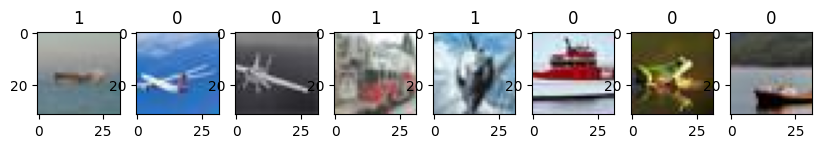

In [26]:
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Preprocessing

In [27]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


Scaling the data between 0 and 1

In [28]:
train_data = train_data.map(lambda x, y : (x/255, y))

In [29]:
scaled_it = train_data.as_numpy_iterator()

In [30]:
batch = scaled_it.next()

In [31]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


In [32]:
#scaling test data
test_data = test_data.map(lambda x, y : (x/255, y))
scaled_it = test_data.as_numpy_iterator()
test_batch = scaled_it.next()
print(test_batch[0].min())
print(test_batch[0].max())
print(len(test_data))

0.0
1.0
625


Splitting the data into training, cross-validation sets

In [33]:
len(train_data)


3125

In [34]:
train_size = int(len(train_data)*0.8)
cv_size = int(len(train_data)*0.2)


In [35]:
train_size+cv_size

3125

In [36]:
train = train_data.take(train_size)
cv = train_data.skip(train_size).take(cv_size)


In [37]:
len(train)+len(cv)

3125

### Building the DL Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import regularizers

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))

model.add(Conv2D(32, (4, 4), 1, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))

model.add(Conv2D(16, (4, 4), 1, activation='relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2), strides=1, padding='valid'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

d:\vscode\FYP_final\FYP\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#this is not used

model = Sequential()

model.add(Conv2D(16, (3, 3), strides=1, padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01),
                 input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(32, (3, 3), strides=1, padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(16, (3, 3), strides=1, padding='same', activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  

In [41]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 25, 25, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 21, 21, 16)     │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       204,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,081 (867.50 KB)

 Trainable params: 222,081 (867.50 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
logdir = 'logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=8, validation_data=cv, callbacks=[tensorboard_callback])

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 734s 291ms/step - accuracy: 0.7710 - loss: 0.5597 - val_accuracy: 0.8695 - val_loss: 0.3365
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 255s 102ms/step - accuracy: 0.8631 - loss: 0.3497 - val_accuracy: 0.8721 - val_loss: 0.3419
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 242s 97ms/step - accuracy: 0.8776 - loss: 0.3159 - val_accuracy: 0.8934 - val_loss: 0.2837
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 243s 97ms/step - accuracy: 0.8859 - loss: 0.3002 - val_accuracy: 0.8981 - val_loss: 0.2754
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 234s 94ms/step - accuracy: 0.8913 - loss: 0.2879 - val_accuracy: 0.9050 - val_loss: 0.2592
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 229s 91ms/step - accuracy: 0.8941 - loss: 0.2826 - val_accuracy: 0.9052 - val_loss: 0.2564
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 222s 89ms/step - accuracy: 0.8960 - loss: 0.2782 - val_accuracy: 0.9092 - val_loss: 0.2508
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 243s 97ms/step - accuracy: 0.8994

### Performance

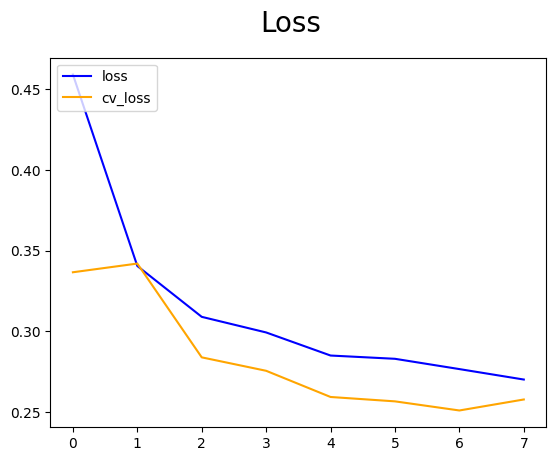

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

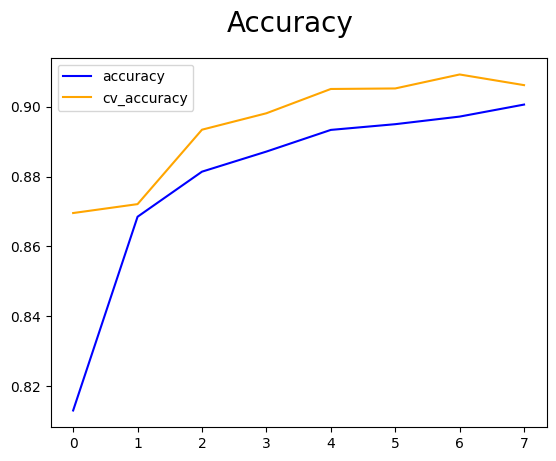

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [48]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [49]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [50]:
for test_batch in test_data.as_numpy_iterator(): 
    X, y = test_batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━

In [51]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9138970971107483, Recall: 0.8937000036239624, Accuracy: 0.9047499895095825


In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('model','ai_imageclassifier.h5'))

In [54]:
model = load_model(os.path.join('model','ai_imageclassifier.h5'))

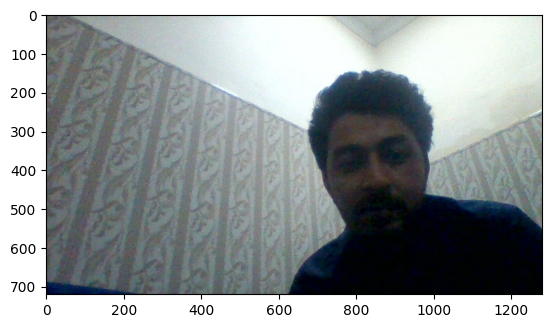

In [71]:
img = cv2.imread('test_images\WIN_20250417_01_05_43_Pro.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [72]:
resize = tf.image.resize(img, (32, 32))

In [73]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [74]:
y_pred

array([[0.01884957]], dtype=float32)

In [77]:
if y_pred < 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: REAL
